# Data Analysis of Earthquakes in Kyrgyzstan

## Data description:

**Columns:**

date - Date of earthquake;<br>
time - Time (UTC);<br>
lat - Latitude;<br>
lon - Longitude;<br>
region - Region name;<br>
depth - Depth;<br>
mt - Magnitude Type;<br>
mag - Magnitude;

## Importing libraries and reading the dataset

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from scipy.stats import mannwhitneyu

In [5]:
df = pd.DataFrame()

for filename in os.listdir('./data'):
    if filename.endswith('csv'):
        temp_df = pd.read_csv(f'./data/{filename}', sep=';')
        df = pd.concat([df, temp_df])

In [3]:
df.head()

,Date,Time (UTC),Latitude,Longitude,Region name,Depth,Magnitude Type,Magnitude,EqId,Unnamed: 9
0,2012-11-28,05:30:13,41.92,77.69,KYRGYZSTAN,40,mb,4.9,294872,NaN
1,2012-11-19,15:28:35,40.81,74.10,KYRGYZSTAN,1,mb,4.4,293381,NaN
2,2012-11-15,00:25:51,39.61,73.73,KYRGYZSTAN,50,mb,4.3,292704,NaN
3,2012-10-27,11:37:57,39.51,73.51,KYRGYZSTAN,1,mb,4.7,290170,NaN
4,2012-10-14,16:30:08,40.89,74.05,KYRGYZSTAN,2,mb,4.2,288671,NaN


## Data Cleaning

In [4]:
# drop unnecessary column
df.drop('Unnamed: 9', axis=1, inplace=True)

# drop EqId column
df.drop('EqId', axis=1, inplace=True)

In [5]:
# rename columns
df.columns = ['date', 'time', 'lat', 'lon', 'region', 'depth', 'mt', 'mag']

print(df.columns)

Index(['date', 'time', 'lat', 'lon', 'region', 'depth', 'mt', 'mag'], dtype='object')


In [6]:
# convert date to pandas datetime format
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [7]:
# sort data by date descending
df.sort_values('date', ascending=False, inplace=True)

In [8]:
df.head()

,date,time,lat,lon,region,depth,mt,mag
0,2024-08-02,14:04:13,39.59,71.55,KYRGYZSTAN,13,M,3.8
1,2024-07-29,18:52:50,42.06,80.11,KYRGYZSTAN,0,M,3.2
2,2024-07-28,12:31:00,42.18,71.77,KYRGYZSTAN,10,M,2.2
3,2024-07-27,12:17:34,41.99,79.60,KYRGYZSTAN,0,mb,3.6
4,2024-07-24,14:38:56,41.81,77.01,KYRGYZSTAN,0,M,2.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1886 entries, 0 to 84
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1886 non-null   datetime64[ns]
 1   time    1886 non-null   object        
 2   lat     1886 non-null   float64       
 3   lon     1886 non-null   float64       
 4   region  1886 non-null   object        
 5   depth   1886 non-null   int64         
 6   mt      1886 non-null   object        
 7   mag     1886 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 132.6+ KB


### Creating earthquake map for 2024

In [10]:
# Создание карты
map_earthquakes = folium.Map(location=[41.2044, 74.7661], zoom_start=7)

# Добавление точек на карту
for _, row in df[df.date.dt.year == 2024].iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['mag'],
        popup=f"Magnitude: {row['mag']}\nDepth: {row['depth']} km\nLocation: {row['region']}",
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(map_earthquakes)

# Сохранение карты в HTML файл
# map_earthquakes.save('earthquakes_kyrgyzstan_map.html')
map_earthquakes

## Frequency of earthquakes by years

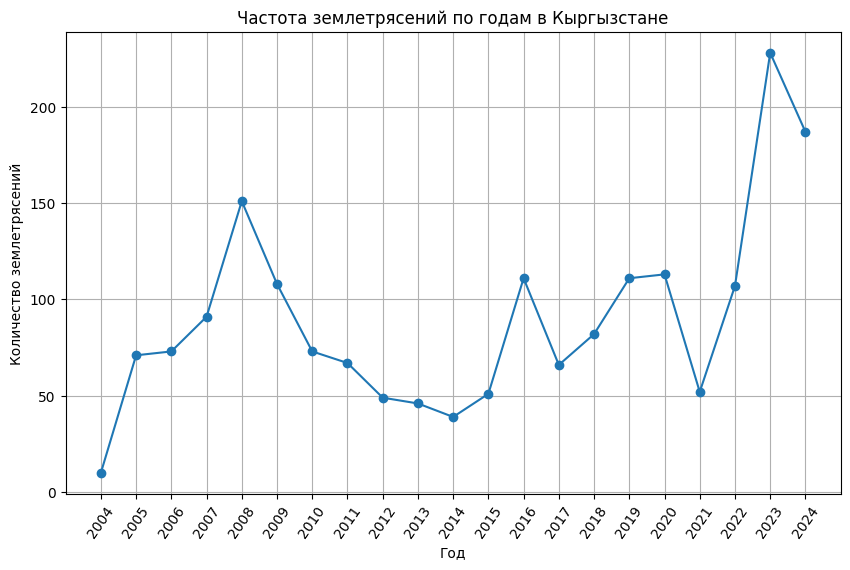

In [11]:
df['year'] = df.date.dt.year
yearly_counts = df.groupby('year').size()

# Построение графика частоты землетрясений по годам
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xticks(yearly_counts.index)
plt.title('Частота землетрясений по годам в Кыргызстане')
plt.xlabel('Год')
plt.tick_params(axis='x', rotation=55)
plt.ylabel('Количество землетрясений')
plt.grid(True)
plt.show()

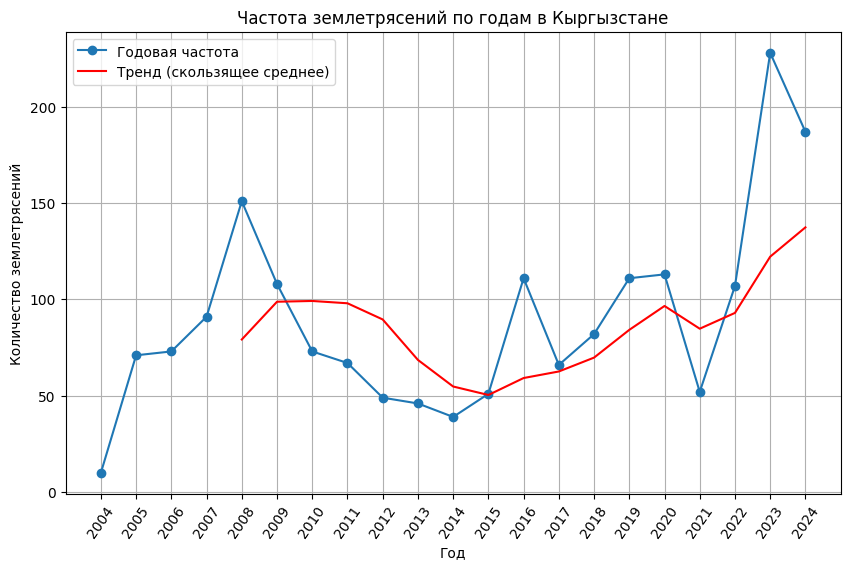

In [12]:
# Проверка тренда
trend = yearly_counts.rolling(window=5).mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label='Годовая частота')
plt.xticks(yearly_counts.index)
plt.tick_params(axis='x', rotation=55)
plt.plot(trend.index, trend.values, color='red', label='Тренд (скользящее среднее)')
plt.title('Частота землетрясений по годам в Кыргызстане')
plt.xlabel('Год')
plt.ylabel('Количество землетрясений')
plt.legend()
plt.grid(True)
plt.show()

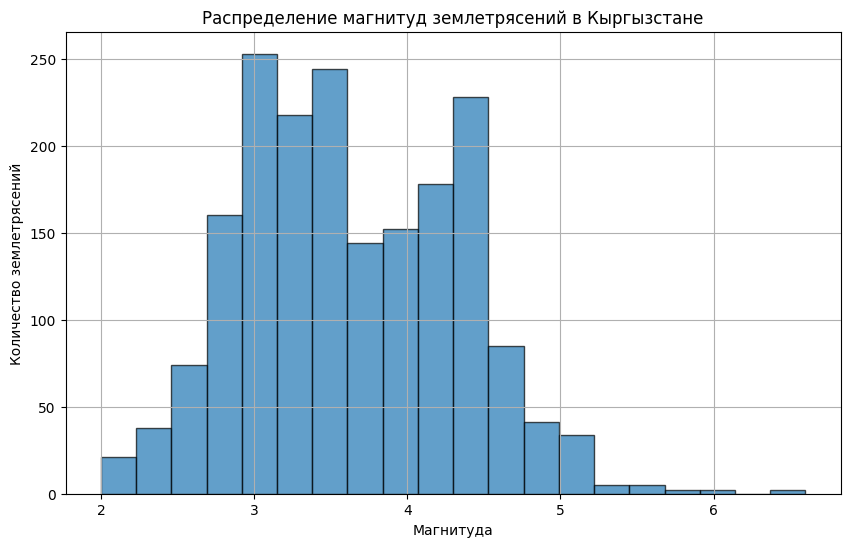

In [13]:
# Построение гистограммы распределения магнитуд
plt.figure(figsize=(10, 6))
plt.hist(df['mag'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Распределение магнитуд землетрясений в Кыргызстане')
plt.xlabel('Магнитуда')
plt.ylabel('Количество землетрясений')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


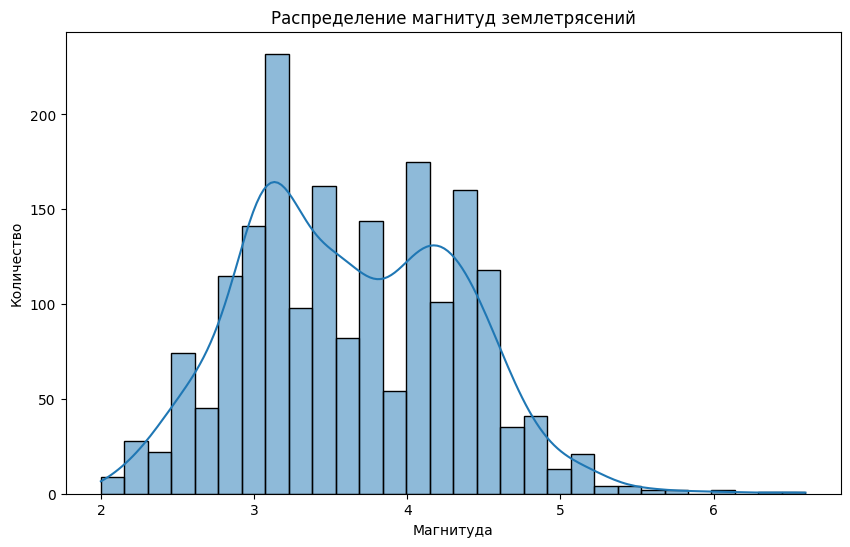

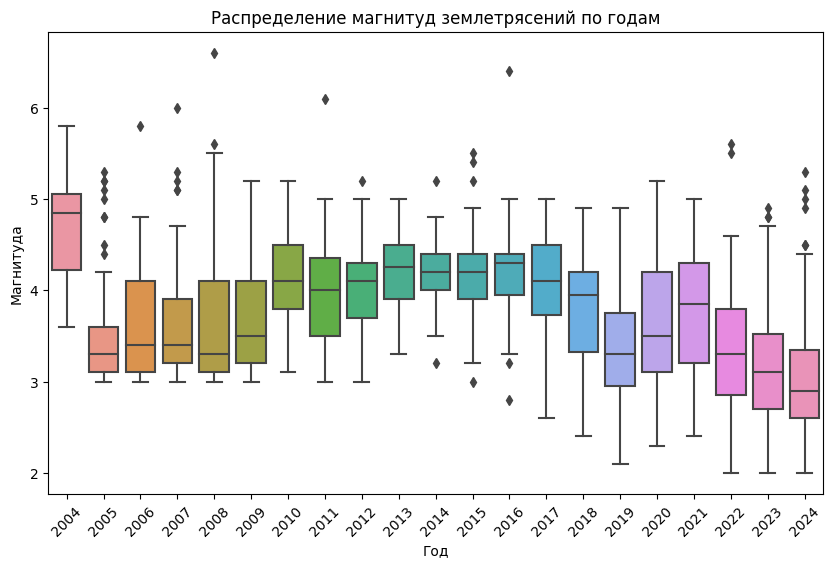

In [14]:
#df = df.replace([np.inf, -np.inf], np.nan)

# Построение гистограммы распределения магнитуд землетрясений
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], bins=30, kde=True)
plt.title('Распределение магнитуд землетрясений')
plt.xlabel('Магнитуда')
plt.ylabel('Количество')
plt.show()

# Построение коробчатой диаграммы распределения магнитуд по годам
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='mag', data=df)
plt.title('Распределение магнитуд землетрясений по годам')
plt.xlabel('Год')
plt.ylabel('Магнитуда')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


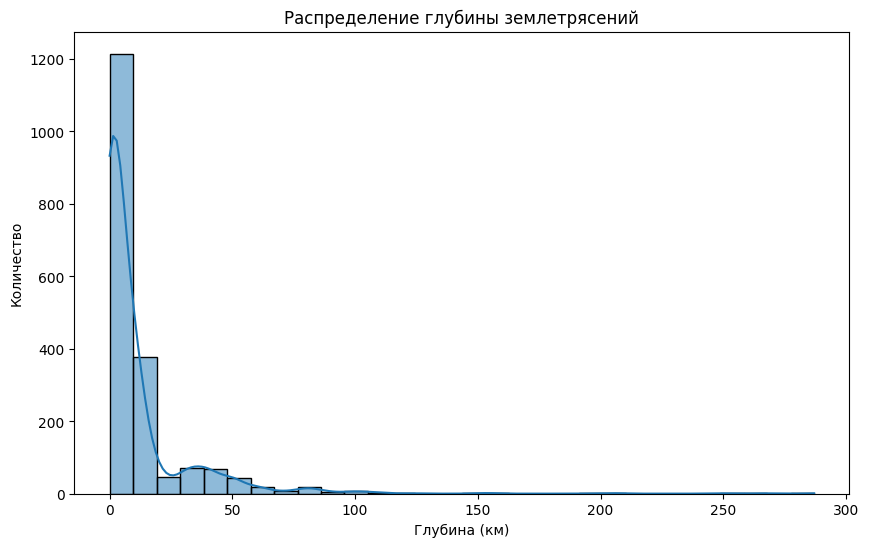

In [15]:
# Построение гистограммы распределения глубины землетрясений
plt.figure(figsize=(10, 6))
sns.histplot(df['depth'], bins=30, kde=True)
plt.title('Распределение глубины землетрясений')
plt.xlabel('Глубина (км)')
plt.ylabel('Количество')
plt.show()

In [16]:
# Функция для определения сезона
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    
# Применение функции к данным
df['season'] = df.date.dt.month.apply(get_season)

# Hypothesis:

Летом и весной землетрясение сильнее, чем зимой и осенью

## Корреляция между магнитудой землетрясений и сезоном

In [17]:
# Бинаризация сезона: лето и весна = 1, зима и осень = 0
df['season_binary'] = df['season'].apply(lambda x: 1 if x in ['Spring', 'Summer'] else 0)

# Корреляция между бинарным сезоном и магнитудой землетрясений
correlation = df['season_binary'].corr(df['mag'])
print(f'Корреляция между сезоном и магнитудой: {correlation}')


Корреляция между сезоном и магнитудой: 0.02892937793009036


### Вывод:

Значение корреляции близко к нулю, что указывает на слабую или практически отсутствующую линейную связь между сезоном и магнитудой землетрясений. Это означает, что изменение сезонов практически не влияет на изменение магнитуды землетрясений. 

Корреляция в 0.0289 слишком мала, чтобы быть практически значимой. Это означает, что сезон не является сильным предиктором магнитуды землетрясений.

In [18]:
from scipy.stats import mannwhitneyu

# Разделение данных на две группы: лето/весна и зима/осень
summer_spring = df[df['season_binary'] == 1]['mag']
winter_autumn = df[df['season_binary'] == 0]['mag']

# Тест Манна-Уитни
stat, p = mannwhitneyu(summer_spring, winter_autumn)
print(f'Статистика Манна-Уитни: {stat}')
print(f'p-value: {p}')

if p < 0.05:
    print("Существует статистически значимая разница в магнитуде землетрясений между сезонами.")
else:
    print("Не существует статистически значимой разницы в магнитуде землетрясений между сезонами.")


Статистика Манна-Уитни: 459944.0
p-value: 0.09152444223109903
Не существует статистически значимой разницы в магнитуде землетрясений между сезонами.


### Вывод:

Тест Манна-Уитни показал, что p-value равно 0.0915, что больше порогового значения 0.05. Таким образом, нет оснований утверждать, что магнитуды землетрясений летом и весной значительно отличаются от магнитуд землетрясений зимой и осенью. Гипотеза о более высоких магнитудах летом и весной не подтверждается.

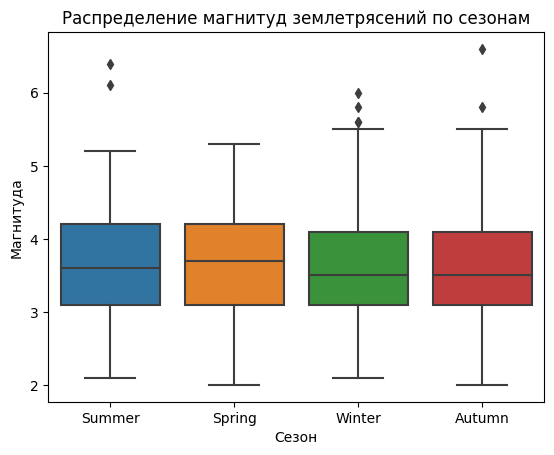

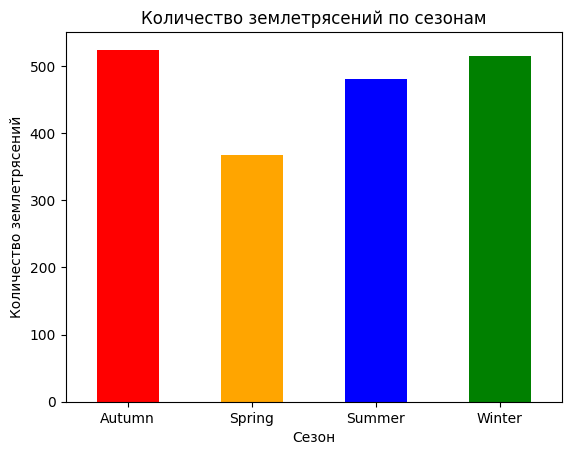

In [19]:
# Визуализация распределения магнитуд по сезонам
sns.boxplot(x='season', y='mag', data=df)
plt.title('Распределение магнитуд землетрясений по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Магнитуда')
plt.show()

# Визуализация количества землетрясений по сезонам
season_counts = df['season'].value_counts().sort_index()
season_counts.plot(kind='bar', color=['red', 'orange', 'blue', 'green'])
plt.title('Количество землетрясений по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество землетрясений')
plt.xticks(rotation=0)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


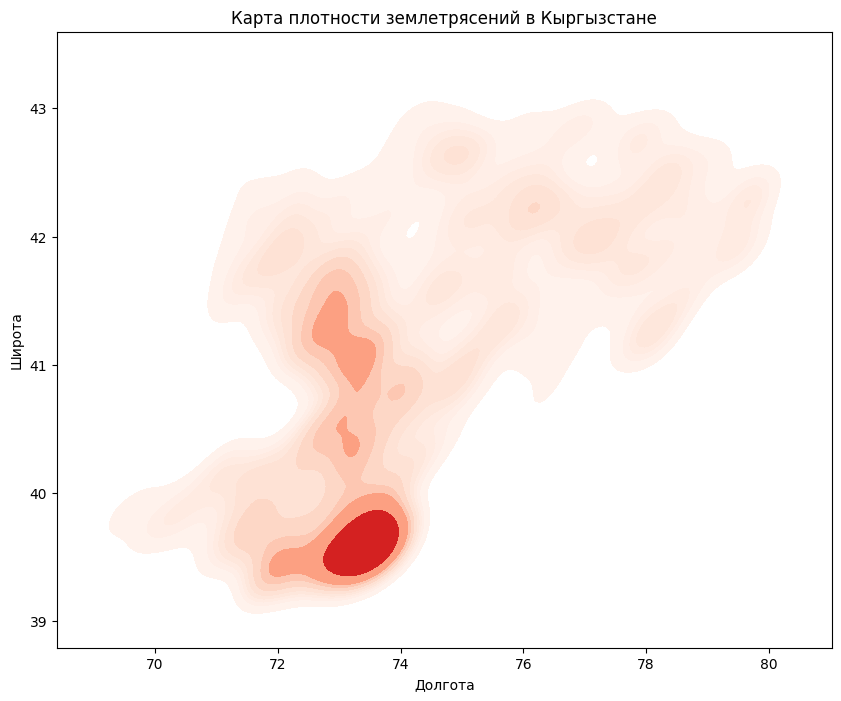

In [20]:
# Построение карты плотности землетрясений
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['lon'], y=df['lat'], cmap='Reds', fill=True, bw_adjust=0.5)
plt.title('Карта плотности землетрясений в Кыргызстане')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

In [21]:
# Создание карты
full_map_earthquakes = folium.Map(location=[41.2044, 74.7661], zoom_start=6)

# Добавление точек на карту
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['mag'],
        popup=f"Magnitude: {row['mag']}\nDepth: {row['depth']} km\nLocation: {row['region']}",
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(full_map_earthquakes)

# Сохранение карты в HTML файл
# map_earthquakes.save('earthquakes_kyrgyzstan_map.html')
full_map_earthquakes

### Hypothesis

Чем глубже очаг землетрясения, тем выше его магнитуда,

In [27]:
print(f'Корреляция между глубиной очага и магнитудой: {df.depth.corr(df.mag)}')

Корреляция между глубиной очага и магнитудой: 0.22247601311691223


### Вывод:

Значение корреляции в 0.22 говорит о слабой положительной связи между глубиной очага и магнитудой землетрясений. Это означает, что увеличение глубины очага немного связано с увеличением магнитуды землетрясений, но эта связь незначительна.

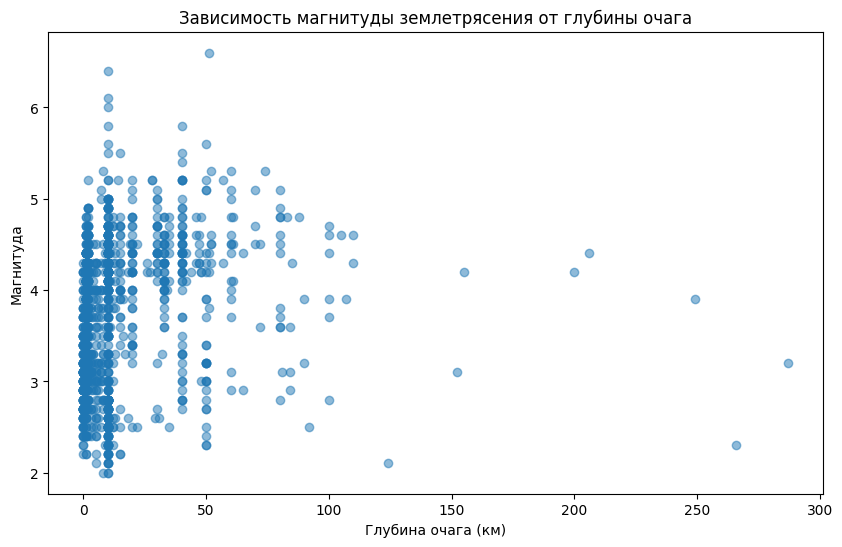

In [25]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(df['depth'], df['mag'], alpha=0.5)
plt.title('Зависимость магнитуды землетрясения от глубины очага')
plt.xlabel('Глубина очага (км)')
plt.ylabel('Магнитуда')
plt.show()